# 시각화

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

# 데이터 전처리

## 관광여행횟수_성별_연령_여행지활동(2018-2022) = gender_age_travelActivities(2020-2022)

### 1. 년도별 전체(소계) 비교 - 2020, 2021, 2022년도 합계
### 2. 3년도는 합치고 남여 비교
### 3. 3년도는 합치고 나이대별 비교
### 4. 3년도는 합치고 항목별 비교

In [34]:
import numpy as np
import pandas as pd
import pymongo
client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection=db['gender_age_travelActivities(2020-2022)']
data = collection.find()
df_gender_age_travelActivities = pd.DataFrame(data)
df_gender_age_travelActivities

,_id,classification,values,year,month,visitor_percent
0,662619a0db3227b4f2b26605,전체,소계,2020,자연 및 풍경감상,78.1
1,662619a0db3227b4f2b26606,전체,소계,2020,음식관광(지역 맛집 등),53.9
2,662619a0db3227b4f2b26607,전체,소계,2020,휴식/휴양,57.6
3,662619a0db3227b4f2b26608,전체,소계,2020,가족/친지/친구 방문,16.3
4,662619a0db3227b4f2b26609,전체,소계,2020,역사 유적지 방문,8.5
...,...,...,...,...,...,...
625,662619a0db3227b4f2b26876,연령,70대 이상,2022,회의참가/시찰,0.4
626,662619a0db3227b4f2b26877,연령,70대 이상,2022,교육/훈련/연수,0.2
627,662619a0db3227b4f2b26878,연령,70대 이상,2022,스포츠 경기관람,-
628,662619a0db3227b4f2b26879,연령,70대 이상,2022,카지노 경마 경륜 등,0.1


In [4]:
# 결측치와 이상치 확인     -> 없음 확인
df_gender_age_travelActivities.isnull().sum()

_id                0
classification     0
values             0
year               0
month              0
visitor_percent    0
dtype: int64

In [5]:
# 전체적인 컬럼 확인
df_gender_age_travelActivities.columns

Index(['_id', 'classification', 'values', 'year', 'month', 'visitor_percent'], dtype='object')

In [6]:
# 년도별 전체(소계) 비교 - 2020, 2021, 2022년도 합계
df_gender_age_month_totalsum = df_gender_age_travelActivities[df_gender_age_travelActivities['classification'] == '전체'].sort_values('visitor_percent', ascending=False)

In [7]:
## 년도별 전체(소계) 비교 - 2020, 2021, 2022년도 합계
pd.pivot_table(data=df_gender_age_month_totalsum,index='year',values='visitor_percent',aggfunc='mean')

,visitor_percent
year,
2020,12.385714
2021,12.961905
2022,12.833333


In [8]:
# 3년도는 합치고 남여 비교
df_gender_age_travelActivitiesgendercompare = df_gender_age_travelActivities[df_gender_age_travelActivities['classification'] == '성별'].sort_values('visitor_percent', ascending=False)

In [9]:
## 3년도는 합치고 남여 비교
pd.pivot_table(data=df_gender_age_travelActivitiesgendercompare,index='values',values='visitor_percent',aggfunc='mean')

,visitor_percent
values,
남자,12.573016
여자,12.871429


In [10]:
# 3년도는 합치고 나이대별 비교
df_gender_age_travelActivities = df_gender_age_travelActivities.replace('-',0)
df_gender_age_travelActivities.query("classification=='연령'").sort_values('visitor_percent', ascending=False)
# df_gender_age_travelActivities_agecompare = df_gender_age_travelActivities[df_gender_age_travelActivities['classification'] == '연령'].sort_values('visitor_percent', ascending=False)

/tmp/ipykernel_11397/4000876918.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_gender_age_travelActivities = df_gender_age_travelActivities.replace('-',0)


,_id,classification,values,year,month,visitor_percent
462,662619a0db3227b4f2b267d3,연령,50대,2021,자연 및 풍경감상,83.5
483,662619a0db3227b4f2b267e8,연령,50대,2022,자연 및 풍경감상,83.1
399,662619a0db3227b4f2b26794,연령,40대,2021,자연 및 풍경감상,82.7
420,662619a0db3227b4f2b267a9,연령,40대,2022,자연 및 풍경감상,82.0
546,662619a0db3227b4f2b26827,연령,60대,2022,자연 및 풍경감상,81.9
...,...,...,...,...,...,...
607,662619a0db3227b4f2b26864,연령,70대 이상,2021,카지노 경마 경륜 등,0.0
228,662619a0db3227b4f2b266e9,연령,15~19세,2021,스포츠 경기관람,0.0
207,662619a0db3227b4f2b266d4,연령,15~19세,2020,스포츠 경기관람,0.0
627,662619a0db3227b4f2b26878,연령,70대 이상,2022,스포츠 경기관람,0.0


In [35]:
df_age_acitivities=df_gender_age_travelActivities.query("values=='40대'")
df_age_acitivities

,_id,classification,values,year,month,visitor_percent
378,662619a0db3227b4f2b2677f,연령,40대,2020,자연 및 풍경감상,79.4
379,662619a0db3227b4f2b26780,연령,40대,2020,음식관광(지역 맛집 등),54.5
380,662619a0db3227b4f2b26781,연령,40대,2020,휴식/휴양,58.1
381,662619a0db3227b4f2b26782,연령,40대,2020,가족/친지/친구 방문,18.2
382,662619a0db3227b4f2b26783,연령,40대,2020,역사 유적지 방문,9.6
...,...,...,...,...,...,...
436,662619a0db3227b4f2b267b9,연령,40대,2022,회의참가/시찰,0.8
437,662619a0db3227b4f2b267ba,연령,40대,2022,교육/훈련/연수,1.2
438,662619a0db3227b4f2b267bb,연령,40대,2022,스포츠 경기관람,0.1
439,662619a0db3227b4f2b267bc,연령,40대,2022,카지노 경마 경륜 등,0


In [36]:
df_age_acitivities['month'].unique()

array(['자연 및 풍경감상', '음식관광(지역 맛집 등)', '휴식/휴양', '가족/친지/친구 방문', '역사 유적지 방문',
       '테마파크 놀이시설 동/식물원 방문', '시티투어', '쇼핑', '드라마 촬영지 방문',
       '야외 위락 및 스포츠 레포츠 활동', '지역 문화예술/공연/전시시설 관람', '종교/성지순례',
       '지역 축제/이벤트 참가', '교육/체험 프로그램 참가', '온천/스파', '유흥/오락', '회의참가/시찰',
       '교육/훈련/연수', '스포츠 경기관람', '카지노 경마 경륜 등', '기타'], dtype=object)

## 여행 테마별 관광객 비율
- 자연 및 풍경 감상, 음식관광, 휴식/휴양 순으로 많이 차지

In [37]:
pivot_acitivities = pd.pivot_table(data=df_age_acitivities, index='month',values='visitor_percent',aggfunc='mean')
pivot_acitivities=pivot_acitivities.sort_values('visitor_percent',ascending=False)

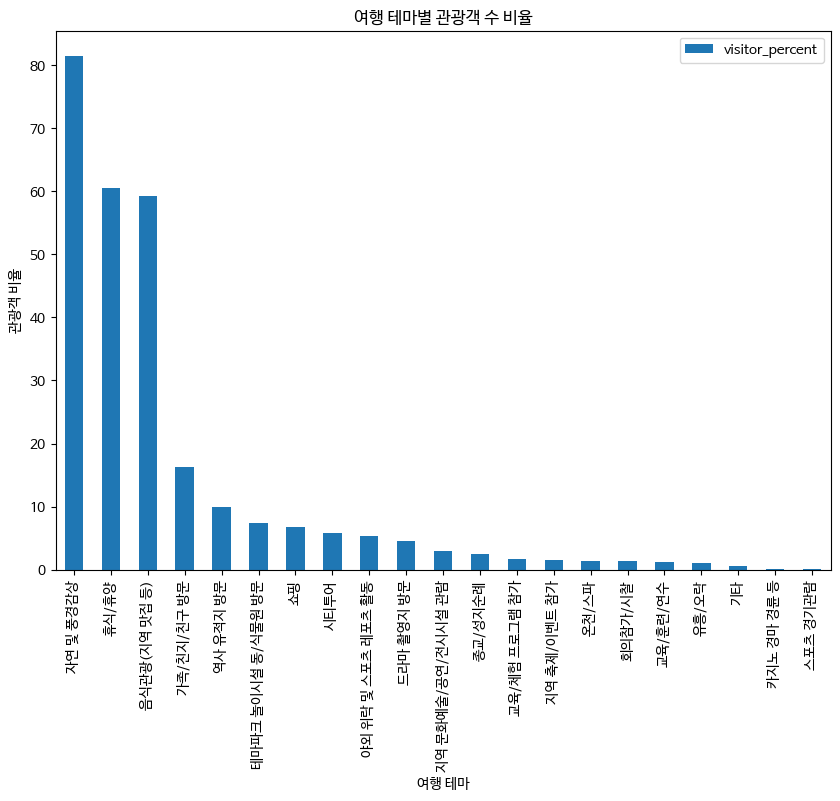

In [38]:
pivot_acitivities = pd.pivot_table(data=df_age_acitivities, index='month',values='visitor_percent',aggfunc='mean')
pivot_acitivities=pivot_acitivities.sort_values('visitor_percent',ascending=False)
# 선 그래프 그리기
# concept 값이 0인 행 제거
pivot_acitivities.plot(kind='bar', figsize=(10, 7))

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('여행 테마별 관광객 수 비율')
plt.xlabel('여행 테마')
plt.ylabel('관광객 비율')
plt.xticks(rotation=90)

# 그래프 표시
plt.show()

## 연령대, 여행 테마별 관광객 비율
- 30,40대의 경우에만 휴식/휴양이 음식관광보다 더 많이 차지함

In [46]:
df_age_acitivities=df_gender_age_travelActivities.query("classification=='연령'")
df_age_acitivities

,_id,classification,values,year,month,visitor_percent
189,662619a0db3227b4f2b266c2,연령,15~19세,2020,자연 및 풍경감상,66.3
190,662619a0db3227b4f2b266c3,연령,15~19세,2020,음식관광(지역 맛집 등),51.1
191,662619a0db3227b4f2b266c4,연령,15~19세,2020,휴식/휴양,52.3
192,662619a0db3227b4f2b266c5,연령,15~19세,2020,가족/친지/친구 방문,20.8
193,662619a0db3227b4f2b266c6,연령,15~19세,2020,역사 유적지 방문,8.8
...,...,...,...,...,...,...
625,662619a0db3227b4f2b26876,연령,70대 이상,2022,회의참가/시찰,0.4
626,662619a0db3227b4f2b26877,연령,70대 이상,2022,교육/훈련/연수,0.2
627,662619a0db3227b4f2b26878,연령,70대 이상,2022,스포츠 경기관람,-
628,662619a0db3227b4f2b26879,연령,70대 이상,2022,카지노 경마 경륜 등,0.1


In [43]:
pivot_age_acitivities

month,가족/친지/친구 방문,교육/체험 프로그램 참가,교육/훈련/연수,기타,드라마 촬영지 방문,쇼핑,스포츠 경기관람,시티투어,야외 위락 및 스포츠 레포츠 활동,역사 유적지 방문,...,유흥/오락,음식관광(지역 맛집 등),자연 및 풍경감상,종교/성지순례,지역 문화예술/공연/전시시설 관람,지역 축제/이벤트 참가,카지노 경마 경륜 등,테마파크 놀이시설 동/식물원 방문,회의참가/시찰,휴식/휴양
values,,,,,,,,,,,,,,,,,,,,,
40대,16.266667,1.633333,1.233333,0.6,4.6,6.7,0.066667,5.8,5.4,9.966667,...,1.033333,59.166667,81.366667,2.566667,3.033333,1.466667,0.066667,7.366667,1.366667,60.533333


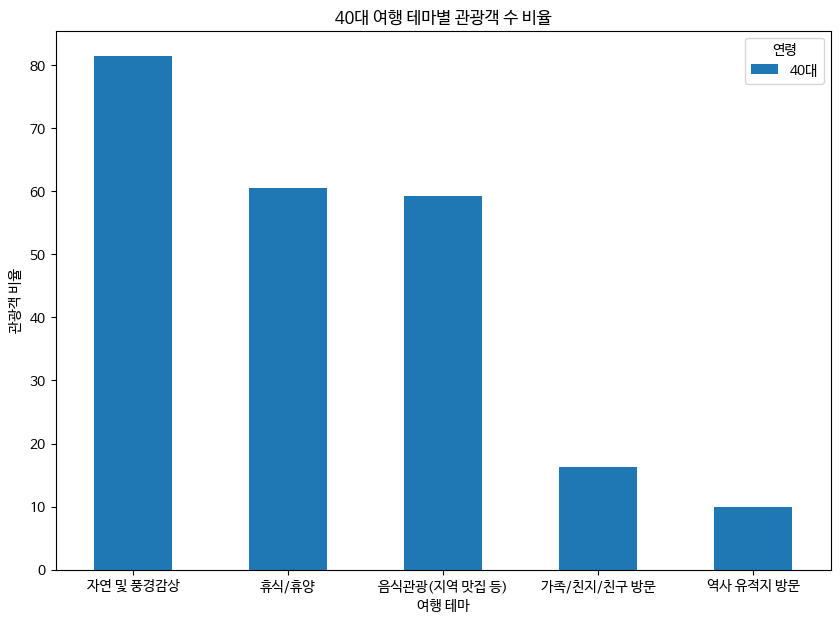

In [50]:
df_age_acitivities = df_age_acitivities.query('values=="40대"')
pivot_age_acitivities = pd.pivot_table(data=df_age_acitivities, index='month',columns='values',values='visitor_percent',aggfunc='mean')
pivot_age_acitivities= pivot_age_acitivities.sort_values("40대",ascending = False)
pivot_age_acitivities = pivot_age_acitivities[:5]# concept 값이 0인 행 제거
ax = pivot_age_acitivities.plot(kind='bar', figsize=(10, 7))

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('40대 여행 테마별 관광객 수 비율')
plt.xlabel('여행 테마')
plt.ylabel('관광객 비율')
ax.legend(title="연령", loc='upper right')
plt.xticks(rotation=0)
# 그래프 표시
plt.show()

In [52]:
df_gender_acitivities=df_gender_age_travelActivities.query("classification=='성별'")
df_gender_acitivities

,_id,classification,values,year,month,visitor_percent
63,662619a0db3227b4f2b26644,성별,남자,2020,자연 및 풍경감상,77.1
64,662619a0db3227b4f2b26645,성별,남자,2020,음식관광(지역 맛집 등),52.6
65,662619a0db3227b4f2b26646,성별,남자,2020,휴식/휴양,56.8
66,662619a0db3227b4f2b26647,성별,남자,2020,가족/친지/친구 방문,15.7
67,662619a0db3227b4f2b26648,성별,남자,2020,역사 유적지 방문,8.3
...,...,...,...,...,...,...
184,662619a0db3227b4f2b266bd,성별,여자,2022,회의참가/시찰,0.4
185,662619a0db3227b4f2b266be,성별,여자,2022,교육/훈련/연수,0.3
186,662619a0db3227b4f2b266bf,성별,여자,2022,스포츠 경기관람,0.1
187,662619a0db3227b4f2b266c0,성별,여자,2022,카지노 경마 경륜 등,0


## 성별, 여행 테마별 관광객 비율
- 전체적으로 비슷하지만 여성이 좀 더 높음

In [53]:
pivot_gender_acitivities = pd.pivot_table(data=df_gender_acitivities, index='month',columns='values',values='visitor_percent',aggfunc='mean')
pivot_gender_acitivities= pivot_gender_acitivities.sort_values("여자",ascending = False)
pivot_gender_acitivities[:5]

values,남자,여자
month,,
자연 및 풍경감상,79.433333,80.866667
음식관광(지역 맛집 등),57.933333,60.2
휴식/휴양,57.766667,59.466667
가족/친지/친구 방문,14.566667,15.6
역사 유적지 방문,8.966667,9.366667


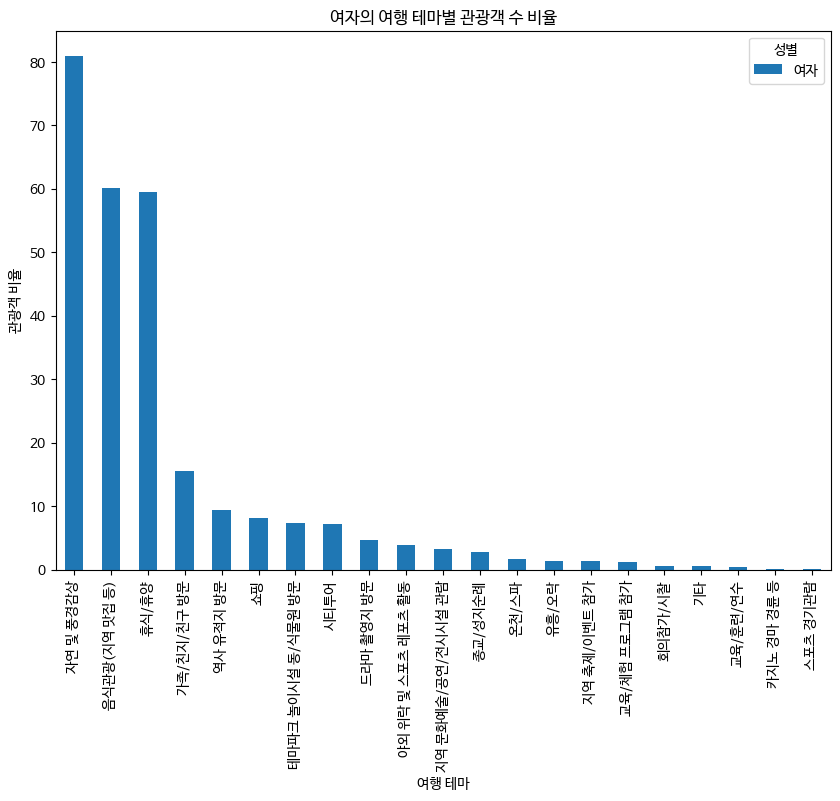

In [57]:
df_gender_acitivities = df_gender_acitivities.query('values=="여자"')
pivot_gender_acitivities = pd.pivot_table(data=df_gender_acitivities, index='month',columns='values',values='visitor_percent',aggfunc='mean')
pivot_gender_acitivities= pivot_gender_acitivities.sort_values("여자",ascending = False)
pivot_gender_acitivities = pivot_gender_acitivities# concept 값이 0인 행 제거
ax = pivot_gender_acitivities.plot(kind='bar', figsize=(10, 7))

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('여자의 여행 테마별 관광객 수 비율')
plt.xlabel('여행 테마')
plt.ylabel('관광객 비율')
ax.legend(title="성별", loc='upper right')
plt.xticks(rotation=90)
# 그래프 표시
plt.show()

In [27]:
df_gender_acitivities = df_gender_acitivities.query('values=="여자"')